# Stock analysis
Analysis of 4 stocks using correlation, VAR and Monte Carlo methods. 

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
import quandl
import warnings

sns.set_style('whitegrid')
%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)

quandl.ApiConfig.api_key="your quandl api key"

car_list=['F','GM','ALB','TSLA']
end=datetime.now()
start=datetime(end.year-1, end.month, end.day)
for stock in car_list:
    globals()[stock] = pdr.get_data_quandl(stock,start=start,end = end)     

### Basic analysis of stock info

1.  See statistical data
2.  Plot close prices of the stocks
3.  Analyze MA for a stock

In [2]:
TSLA.describe()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
count,183.000000,183.000000,183.000000,183.000000,1.830000e+02,183.0,183.0,183.000000,183.000000,183.000000,183.000000,1.830000e+02
mean,335.375683,340.129958,329.851522,334.981833,6.224312e+06,0.0,1.0,335.375683,340.129958,329.851522,334.981833,6.224312e+06
std,18.689400,18.606054,19.251656,18.874146,2.722978e+06,0.0,0.0,18.689400,18.606054,19.251656,18.874146,2.722978e+06
min,299.500000,304.270000,277.180000,279.180000,3.028578e+06,0.0,1.0,299.500000,304.270000,277.180000,279.180000,3.028578e+06
25%,318.220000,324.520000,313.835000,319.570000,4.491842e+06,0.0,1.0,318.220000,324.520000,313.835000,319.570000,4.491842e+06
50%,336.760000,342.800000,331.280000,335.490000,5.532647e+06,0.0,1.0,336.760000,342.800000,331.280000,335.490000,5.532647e+06
75%,349.775000,354.515000,343.630000,349.390000,7.085726e+06,0.0,1.0,349.775000,354.515000,343.630000,349.390000,7.085726e+06
max,380.250000,389.610000,377.680000,385.000000,1.973132e+07,0.0,1.0,380.250000,389.610000,377.680000,385.000000,1.973132e+07


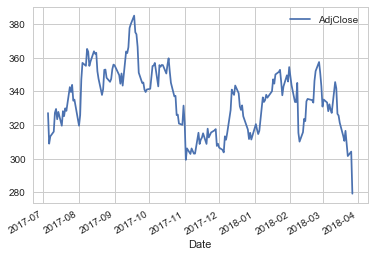

In [3]:
TSLA['AdjClose'].plot(legend=True)

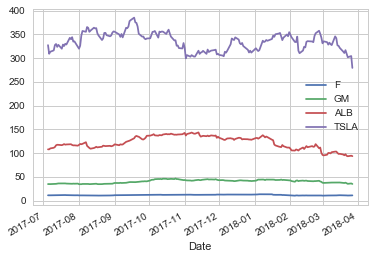

In [4]:
ACdf=pd.DataFrame()
for stock in car_list:
    #print(stock)
    #print(pdr.get_data_quandl(stock,start=start,end = end)['AdjClose'])
    
    column_name = stock
    ACdf[column_name]=pdr.get_data_quandl(stock,start=start,end = end)['AdjClose']
    
ACdf.plot()

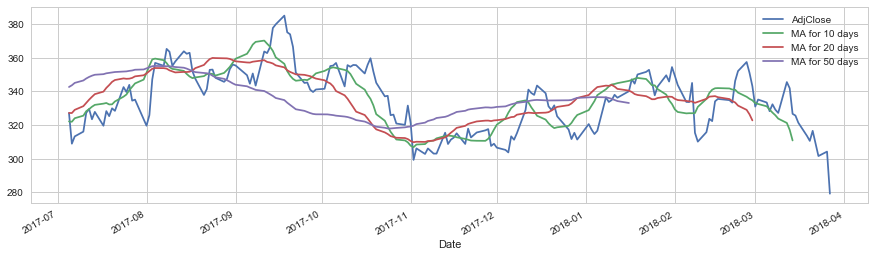

In [5]:
ma_day=[10,20,50] #lista ma

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    TSLA[column_name]=pd.rolling_mean(TSLA['AdjClose'],ma)
    
TSLA[['AdjClose','MA for 10 days', 'MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(15,4))

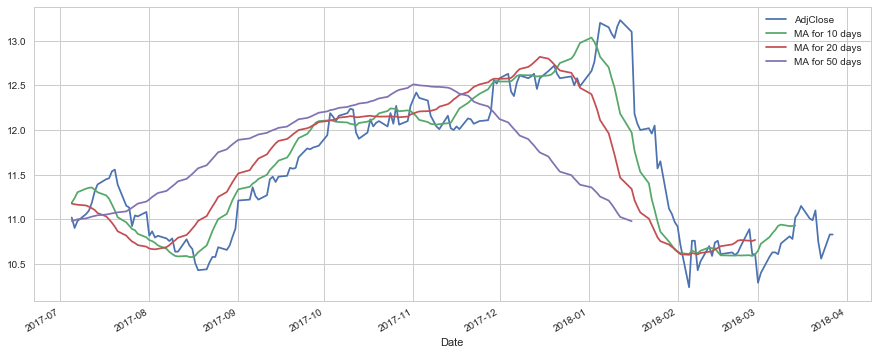

In [6]:
ma_day=[10,20,50] #lista ma

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    F[column_name]=pd.rolling_mean(F['AdjClose'],ma)
    
F[['AdjClose','MA for 10 days', 'MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(15,6))

### Daily return analysis
1. Plot percentage change
2. Plot histogram of daily returns
3. Compare daily returns
4. Check correlation between stocks

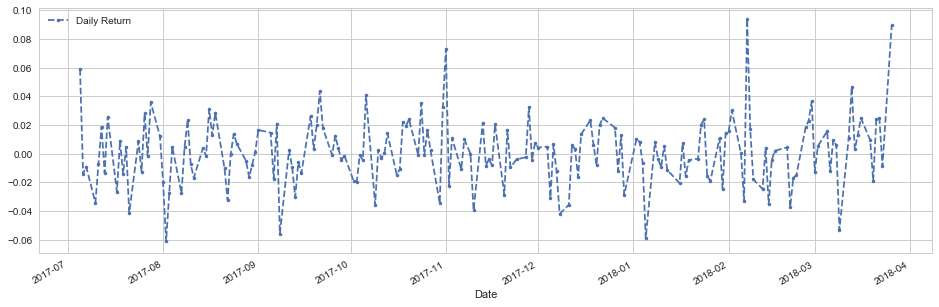

In [7]:
TSLA['Daily Return'] = TSLA['AdjClose'].pct_change()

TSLA['Daily Return'].plot(figsize=(16,5),legend=True,linestyle='--',marker='.')


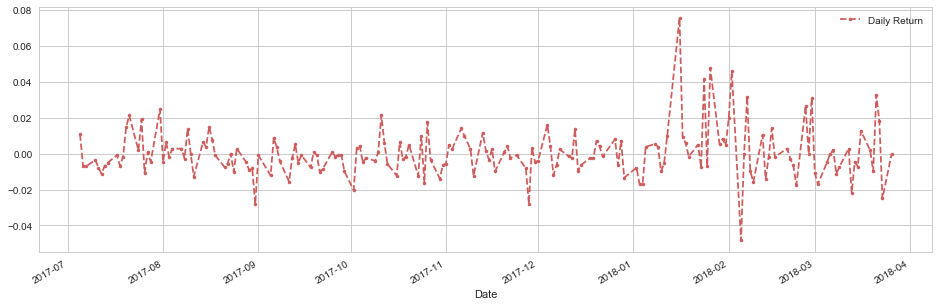

In [8]:
F['Daily Return'] = F['AdjClose'].pct_change()
F['Daily Return'].plot(figsize=(16,5),legend=True,linestyle='--',marker='.', color='indianred')


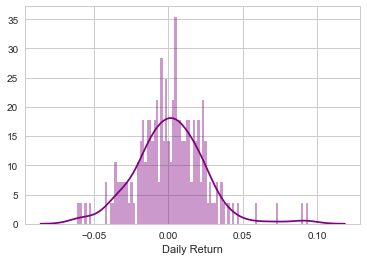

In [9]:
sns.distplot(TSLA['Daily Return'].dropna(),bins=100,color='purple')


In [10]:
car_rets=ACdf.pct_change()
car_rets.head()

,F,GM,ALB,TSLA
Date,,,,
2018-03-27,NaN,NaN,NaN,NaN
2018-03-26,0.000000,0.032119,0.009954,0.089548
2018-03-23,-0.024931,-0.022784,-0.011869,-0.008679
2018-03-22,0.017992,0.033551,0.009331,0.025071
2018-03-21,0.032558,0.033838,0.035703,0.024038


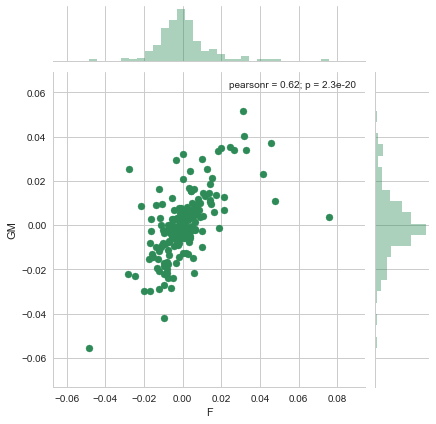

In [11]:
sns.jointplot('F','GM',car_rets,kind='scatter',color='seagreen')


Pearson R 0.62 means that the stocks are quite correlated

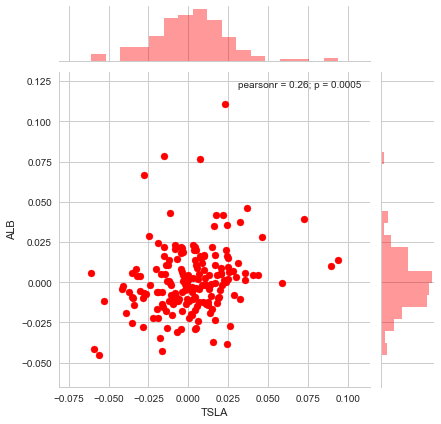

In [12]:
sns.jointplot('TSLA','ALB',car_rets,kind='scatter',color='red')


Interestingly TSLA and ALB are not really correlated

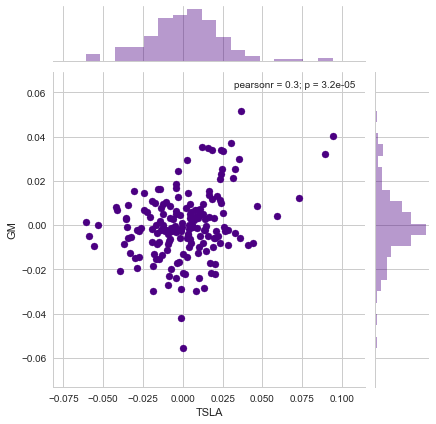

In [13]:
sns.jointplot('TSLA','GM',car_rets,kind='scatter',color='indigo')

TSLA is not correlated to GM either

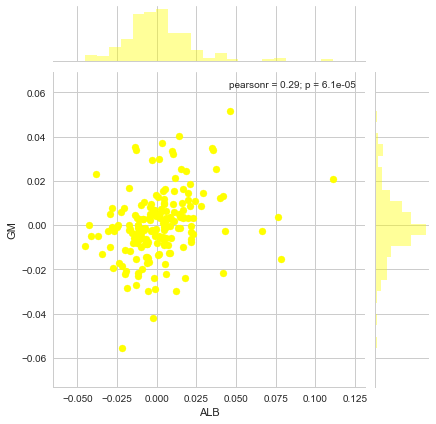

In [14]:
sns.jointplot('ALB','GM',car_rets,kind='scatter',color='yellow')

Also weak correlation

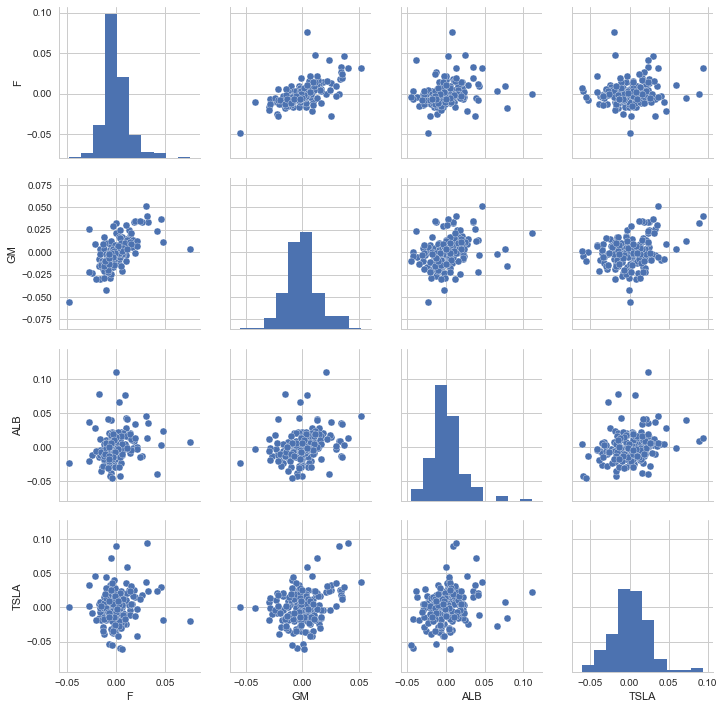

In [15]:
#plotting all of them on one plot
sns.pairplot(car_rets.dropna())

Above we can see the relationship between daily returns of those 4 stocks. Interestingly only two stocks show somewhat significant correlation: GM and F. That is probably the case because of the similarity of those two stocks. TSLA only deals with electric cars but ALB which produces batteries for electric cars is not closely correlated with any of those other companies as well.

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


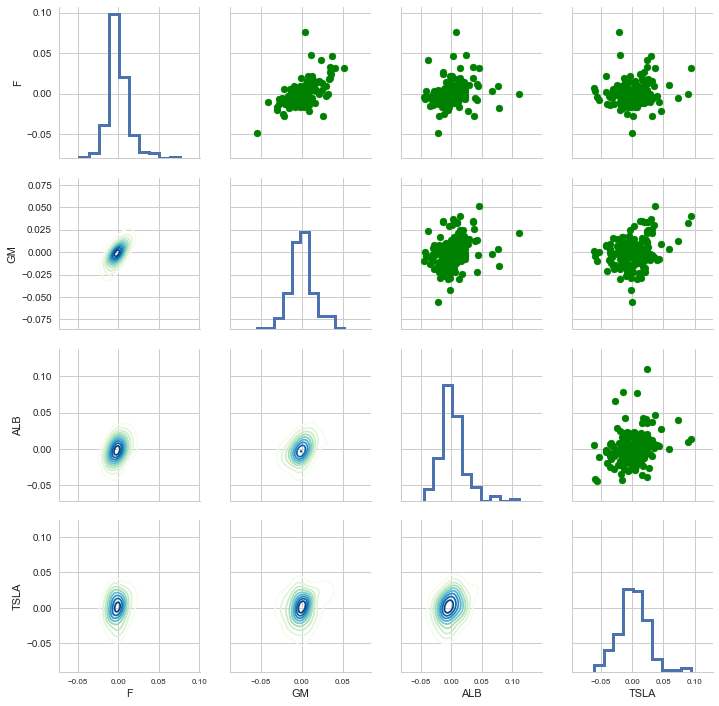

In [16]:
returns_fig = sns.PairGrid(car_rets.dropna())
returns_fig.map_upper(plt.scatter,color='green')
returns_fig.map_lower(sns.kdeplot,cmap='GnBu')
returns_fig.map_diag(plt.hist,histtype="step", linewidth=3)
for ax in returns_fig.axes.flat:
    ax.tick_params(axis='x', labelsize=8)


C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


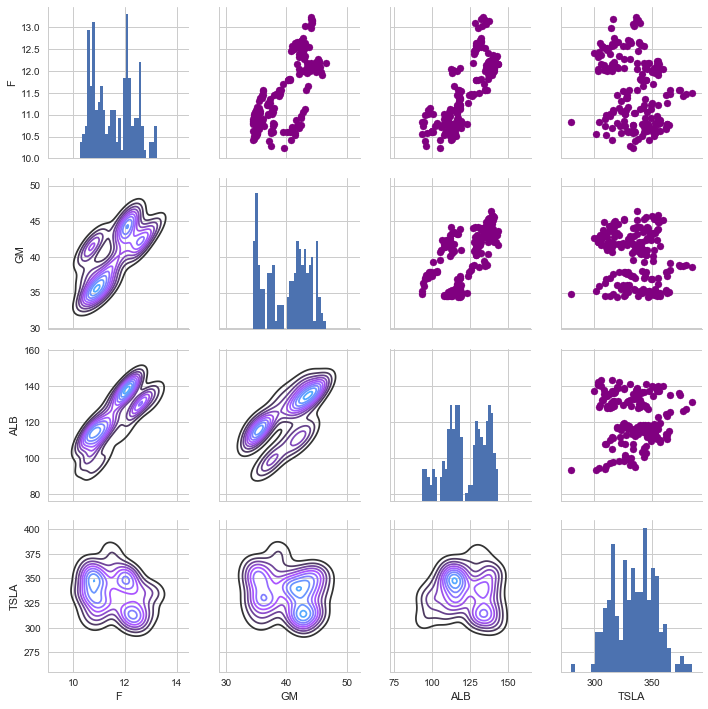

In [17]:
returns_fig = sns.PairGrid(ACdf)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

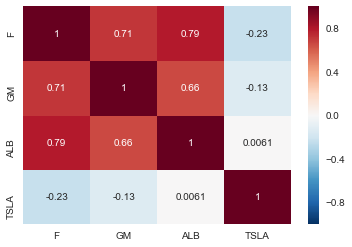

In [18]:
sns.heatmap(ACdf.dropna().corr(), annot=True) 

Low correlation between TSLA and other companeis means that in that period TSLA was certainly more volatile than other 3 and also had different results.

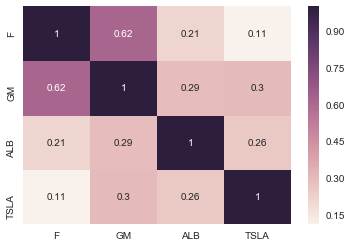

In [19]:
sns.heatmap(car_rets.dropna().corr(), annot=True) 

### Risk Analysis
1. Compare expected return with the standard deviation of the daily returns
2. Value at Risk using "bootstrap" method
3. Value at Risk using the Monte Carlo method

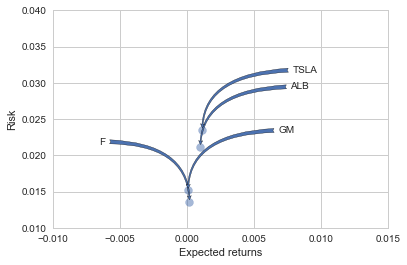

In [20]:
rets=car_rets.dropna()
area = np.pi*20

plt.ylim([0.01,0.04])
plt.xlim([-0.010,0.015]) 


plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    if label=='F':
        plt.annotate(
        label, 
        xy = (x, y), xytext = (-90, 60),
        textcoords = 'offset pixels', ha = 'left', va = 'center',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'angle3, angleA=0,angleB=90 '))
    else:
        plt.annotate(
        label, 
        xy = (x, y), xytext = (90, 60),
        textcoords = 'offset pixels', ha = 'left', va = 'center',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'angle3, angleA=0,angleB=90 '))

TSLA has highest risk and highest expcted returns. On the other side of the spectrum is F.


-0.0355218137360822


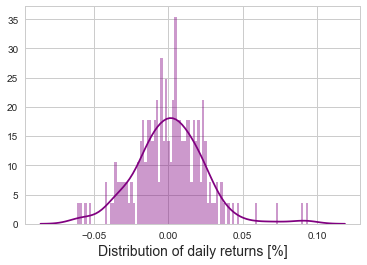

In [21]:
#counting VaR for TSLA
sns.distplot(TSLA['Daily Return'].dropna(),bins=100,color='purple')
plt.xlabel('Distribution of daily returns [%]', fontsize=14)

VarB=rets['TSLA'].quantile(0.05)
print(VarB)

So quantile 0.05 is about -0.035 which means that wiht 95% certainty our worst loss wont be higher than 3.5%, so invetsting one million usd has 5% chance to lose 38k one day


In [22]:
for column in rets:
    print(str(column) + " VaR is " + str(rets[column].quantile(0.05)))

F VaR is -0.01664832925835365
GM VaR is -0.0227589833579242
ALB VaR is -0.028459203895419095
TSLA VaR is -0.0355218137360822


Var using monte carlo method

First need to set time horizon, delta, get mi(drift) and volatility(sigma) of the stock for MC method.
Then simulate and plot results
Create histrogram for end results for larger run.
Then we plot histogram of VaRs and use quantile to check the risk of the stock.


In [23]:
days = 365 
dt = 1/days 
mu = rets.mean()['TSLA'] 
sigma = rets.std()['TSLA']


In [24]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price= np.zeros(days)
    price[0]= start_price
    shock=np.zeros(days)
    drift=np.zeros(days)
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt)) 
        drift[x]=mu*dt
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
    return price

Text(0.5,1,'Monte Carlo analysis for TSLA stock')

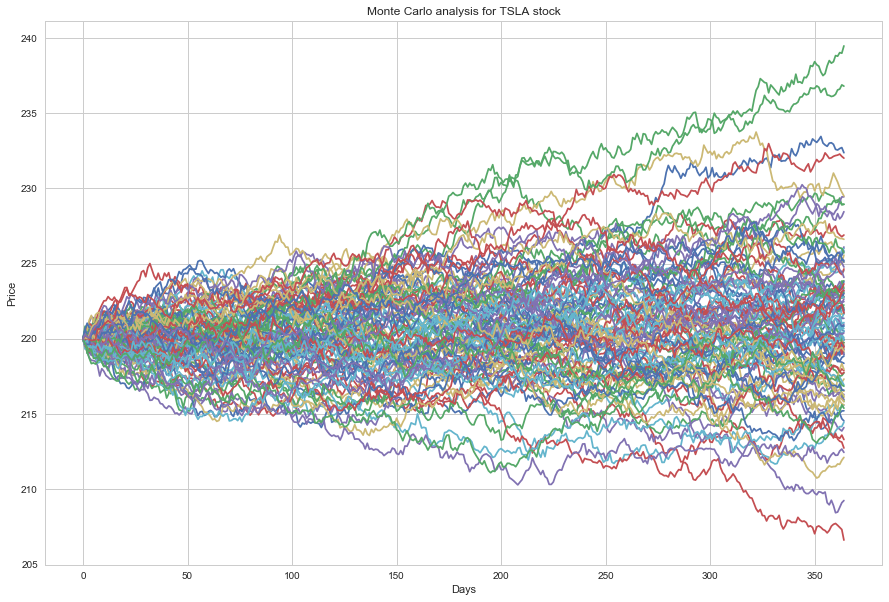

In [25]:
plt.rcParams["figure.figsize"] = (15,10)

start_price=220
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days, mu, sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for TSLA stock')


In [26]:
runs = 10000 
simulations = np.zeros(runs) 
for run in range(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5,1,'Final price distribution for Tesla Stock after 365 days')

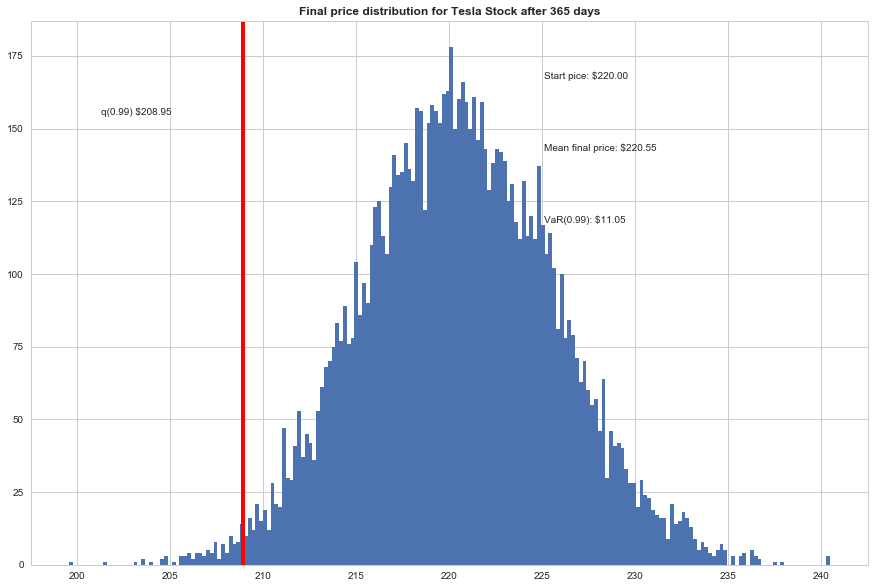

In [27]:
q=np.percentile(simulations,1) 
plt.hist(simulations, bins=200)
plt.figtext(0.6, 0.8, s='Start pice: $%.2f' %start_price)
plt.figtext(0.6, 0.7, 'Mean final price: $%.2f ' % simulations.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,)) 
plt.figtext(0.19,0.75, 'q(0.99) $%.2f' %q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution for Tesla Stock after %s days" % days, weight='bold')

We can see that almost 0 difference between start and final price, so that means that Tesla is in fact not very risky stock
Every initial stock purchase(220) is put at risk for 10.93 USD with 1% chance and there is 1% chance that the price of Tesla will be at 209.07 USD. (so 99% of the time you wont lose more than that)